# Projected Antarctic SMB trends till 2050 with sea level pressure and temperature trends

Author: Ziqi Yin

Last edited: Feb 15, 2025

## Description

- Data:
    - CESM2-AAER, GHG: Single-Forcing large ensembles 4x (SFLE): GHG, AAER, BMB, EE (“everything else” inc. ozone and natural) 15-20 members each
    - CESM2-LE: Large Ensemble (LE) using the 50 members that have smoothed biomass burning
- Period: 2000-2050; accumulation t-series from 1975

In [1]:
# Load Libraries
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cartopy.util as util
import xarray as xr
import pandas as pd
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy.stats import linregress
import matplotlib.path as mpath
import matplotlib.colors as colors

import sys  
home_dir = '/glade/work/ziqiyin/'
sys.path.insert(0, home_dir)
sys.path.append(home_dir + 'function/')

from functions import *

ERROR 1: PROJ: proj_create_from_database: Open of /glade/work/ziqiyin/conda-envs/my-npl-202306a/share/proj failed


## Read data

### SMB

In [2]:
## SMB variables
#CESM2-LE (50 members, 1850-2100)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/large_ensemble_CESM2/'

fn_RAIN_LE = 'b.e21.BHISTsmbb.f09_g17.LE2.EM1-50.clm2.h0.RAIN.185001-210012.nc'
RAIN_LE = xr.open_dataset(path+fn_RAIN_LE).RAIN #[mm/s]
fn_SNOW_LE = 'b.e21.BHISTsmbb.f09_g17.LE2.EM1-50.clm2.h0.SNOW.185001-210012.nc'
SNOW_LE = xr.open_dataset(path+fn_SNOW_LE).SNOW
fn_QSOIL_LE = 'b.e21.BHISTsmbb.f09_g17.LE2.EM1-50.clm2.h0.QSOIL.185001-210012.nc'
QSOIL_LE = xr.open_dataset(path+fn_QSOIL_LE).QSOIL
fn_QRUNOFF_LE = 'b.e21.BHISTsmbb.f09_g17.LE2.EM1-50.clm2.h0.QRUNOFF.185001-210012.nc'
QRUNOFF_LE = xr.open_dataset(path+fn_QRUNOFF_LE).QRUNOFF
SMB_LE = RAIN_LE + SNOW_LE - QSOIL_LE - QRUNOFF_LE
lat = np.array(RAIN_LE.lat)
lon = np.array(RAIN_LE.lon)

#CESM2-AAER (20 members, 1850-2050)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_AAER/'

fn_RAIN_AAER = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-20.clm2.h0.RAIN.185001-205012.nc'
RAIN_AAER = xr.open_dataset(path+fn_RAIN_AAER).RAIN
fn_SNOW_AAER = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-20.clm2.h0.SNOW.185001-205012.nc'
SNOW_AAER = xr.open_dataset(path+fn_SNOW_AAER).SNOW
fn_QSOIL_AAER = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-20.clm2.h0.QSOIL.185001-205012.nc'
QSOIL_AAER = xr.open_dataset(path+fn_QSOIL_AAER).QSOIL
fn_QRUNOFF_AAER = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-20.clm2.h0.QRUNOFF.185001-205012.nc'
QRUNOFF_AAER = xr.open_dataset(path+fn_QRUNOFF_AAER).QRUNOFF
#lon = RAIN_AAER.lon
#lat = RAIN_AAER.lat
SMB_AAER = RAIN_AAER + SNOW_AAER - QSOIL_AAER - QRUNOFF_AAER

#CESM2-AAER (15 members, 1850-2050, to be consistent with CESM2-GHG)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_AAER/'

fn_RAIN_AAER15 = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-15.clm2.h0.RAIN.185001-205012.nc'
RAIN_AAER15 = xr.open_dataset(path+fn_RAIN_AAER15).RAIN
fn_SNOW_AAER15 = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-15.clm2.h0.SNOW.185001-205012.nc'
SNOW_AAER15 = xr.open_dataset(path+fn_SNOW_AAER15).SNOW
fn_QSOIL_AAER15 = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-15.clm2.h0.QSOIL.185001-205012.nc'
QSOIL_AAER15 = xr.open_dataset(path+fn_QSOIL_AAER15).QSOIL
fn_QRUNOFF_AAER15 = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-15.clm2.h0.QRUNOFF.185001-205012.nc'
QRUNOFF_AAER15 = xr.open_dataset(path+fn_QRUNOFF_AAER15).QRUNOFF
SMB_AAER15 = RAIN_AAER15 + SNOW_AAER15 - QSOIL_AAER15 - QRUNOFF_AAER15

#CESM2-GHG (15 members, 1850-2050)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_GHG/'

fn_RAIN_GHG = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-GHG.EM1-15.clm2.h0.RAIN.185001-205012.nc'
RAIN_GHG = xr.open_dataset(path+fn_RAIN_GHG).RAIN
fn_SNOW_GHG = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-GHG.EM1-15.clm2.h0.SNOW.185001-205012.nc'
SNOW_GHG = xr.open_dataset(path+fn_SNOW_GHG).SNOW
fn_QSOIL_GHG = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-GHG.EM1-15.clm2.h0.QSOIL.185001-205012.nc'
QSOIL_GHG = xr.open_dataset(path+fn_QSOIL_GHG).QSOIL
fn_QRUNOFF_GHG = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-GHG.EM1-15.clm2.h0.QRUNOFF.185001-205012.nc'
QRUNOFF_GHG = xr.open_dataset(path+fn_QRUNOFF_GHG).QRUNOFF
SMB_GHG = RAIN_GHG + SNOW_GHG - QSOIL_GHG - QRUNOFF_GHG

#CESM2-PI (? members, 1000-2000)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/pi_control_CESM2/'

fn_RAIN_PI = 'b.e21.B1850.f09_g17.CMIP6-piControl.001.clm2.h0.RAIN.100001-200012.nc'
RAIN_PI = xr.open_dataset(path+fn_RAIN_PI).RAIN.sel(time=slice("1000-02-01", "1452-01-31")) #[mm/s]
fn_SNOW_PI = 'b.e21.B1850.f09_g17.CMIP6-piControl.001.clm2.h0.SNOW.100001-200012.nc'
SNOW_PI = xr.open_dataset(path+fn_SNOW_PI).SNOW.sel(time=slice("1000-02-01", "1452-01-31"))
fn_QSOIL_PI = 'b.e21.B1850.f09_g17.CMIP6-piControl.001.clm2.h0.QSOIL.100001-200012.nc'
QSOIL_PI = xr.open_dataset(path+fn_QSOIL_PI).QSOIL.sel(time=slice("1000-02-01", "1452-01-31"))
fn_QRUNOFF_PI = 'b.e21.B1850.f09_g17.CMIP6-piControl.001.clm2.h0.QRUNOFF.100001-200012.nc'
QRUNOFF_PI = xr.open_dataset(path+fn_QRUNOFF_PI).QRUNOFF.sel(time=slice("1000-02-01", "1452-01-31"))
SMB_PI = RAIN_PI + SNOW_PI - QSOIL_PI - QRUNOFF_PI

In [3]:
## Zwally grounded ice sheet land mask (REMOVAL of ice shelves)
path = '/glade/work/dschneid/zaria_snow/'

fn_GROUNDEDMASK = 'AIS_Groundedmask_Zwally_CESMgrid.nc'
GROUNDEDMASK = xr.open_dataset(path+fn_GROUNDEDMASK).Groundedmask

In [4]:
## Correct time
dates = pd.date_range("1850-01-01", periods=251*12, freq='ME')
SMB_LE['time'] = dates

dates = pd.date_range("1850-01-01", periods=201*12, freq='ME')
SMB_AAER['time'] = dates
SMB_AAER15['time'] = dates
SMB_GHG['time'] = dates

dates = pd.date_range("1800-01-01", periods=452*12, freq='ME') # Cannot assign to year 1000 so add 800 years
SMB_PI['time'] = dates

In [5]:
## Select time period
SMB_LE = SMB_LE.sel(time=slice("1850-01-01", "2050-12-31"))
SMB_AAER = SMB_AAER.sel(time=slice("1850-01-01", "2050-12-31"))
SMB_AAER15 = SMB_AAER15.sel(time=slice("1850-01-01", "2050-12-31"))
SMB_GHG = SMB_GHG.sel(time=slice("1850-01-01", "2050-12-31"))

In [6]:
## Grid area
Re = 6371.22 * 1e3  # [m]

f09_mask_file3 = "/glade/p/cesmdata/cseg/inputdata/share/domains/domain.lnd.fv0.9x1.25_gx1v7.151020.nc"
f09_area = xr.open_dataset(f09_mask_file3)["area"]  # [Radian2]
f09_area['ni'] = lon
f09_area['nj'] = lat

f09_area_sel = f09_area.sel(nj=slice(-90,-60))

f09_area = f09_area.values * Re**2
f09_area_sel = f09_area_sel.values * Re**2

In [7]:
## Calculate Global Mean Sea Level Rise
#rho_ice = 910. #rhoi
rho_seawater = 1028. #rhoo

fn = '/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850G.f09_g17_gl4.CMIP6-1pctCO2to4x-withism.001/lnd/proc/tseries/month_1/b.e21.B1850G.f09_g17_gl4.CMIP6-1pctCO2to4x-withism.001.clm2.h0.RAIN.000101-005012.nc'
f09_land_frac = xr.open_dataset(fn)['landfrac'] #fraction of grid cell that is active

f09_ocn_area = np.sum(f09_area) - (f09_area * f09_land_frac).sum(dim=['lat','lon']).values #m2

### SLP

In [8]:
## PSL
#CESM2-AAER (20 members, 1850-2050)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_AAER/'

fn_PSL_AAER = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-20.cam.h0.PSL.185001-205012.nc'
PSL_AAER = xr.open_dataset(path+fn_PSL_AAER).PSL

#CESM2-AAER (15 members, 1850-2050, to be consistent with CESM2-GHG)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_AAER/'

fn_PSL_AAER15 = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-15.cam.h0.PSL.185001-205012.nc'
PSL_AAER15 = xr.open_dataset(path+fn_PSL_AAER15).PSL

#CESM2-GHG (15 members, 1850-2050)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_GHG/'

fn_PSL_GHG = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-GHG.EM1-15.cam.h0.PSL.185001-205012.nc'
PSL_GHG = xr.open_dataset(path+fn_PSL_GHG).PSL

In [9]:
## Correct time
dates = pd.date_range("1850-01-01", periods=201*12, freq='ME')
PSL_AAER['time'] = dates
PSL_AAER15['time'] = dates
PSL_GHG['time'] = dates

In [10]:
## Select time period
PSL_AAER = PSL_AAER.sel(time=slice("2000-01-01", "2050-12-31"))
PSL_AAER15 = PSL_AAER15.sel(time=slice("2000-01-01", "2050-12-31"))
PSL_GHG = PSL_GHG.sel(time=slice("2000-01-01", "2050-12-31"))

### TREFHT

In [11]:
#CESM2-AAER (20 members, 1850-2050)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_AAER/'

fn_TREFHT_AAER = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-20.cam.h0.TREFHT.185001-205012.nc'
TREFHT_AAER = xr.open_dataset(path+fn_TREFHT_AAER).TREFHT

#CESM2-AAER (15 members, 1850-2050, to be consistent with CESM2-GHG)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_AAER/'

fn_TREFHT_AAER15 = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-AAER.EM1-15.cam.h0.TREFHT.185001-205012.nc'
TREFHT_AAER15 = xr.open_dataset(path+fn_TREFHT_AAER15).TREFHT

#CESM2-GHG (15 members, 1850-2050)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/single_forcing_GHG/'

fn_TREFHT_GHG = 'b.e21.B1850cmip6.f09_g17.CESM2-SF-GHG.EM1-15.cam.h0.TREFHT.185001-205012.nc'
TREFHT_GHG = xr.open_dataset(path+fn_TREFHT_GHG).TREFHT

In [12]:
## Correct time
dates = pd.date_range("1850-01-01", periods=201*12, freq='ME')
TREFHT_AAER['time'] = dates
TREFHT_AAER15['time'] = dates
TREFHT_GHG['time'] = dates

In [13]:
## Select time period
TREFHT_AAER = TREFHT_AAER.sel(time=slice("2000-01-01", "2050-12-31"))
TREFHT_AAER15 = TREFHT_AAER15.sel(time=slice("2000-01-01", "2050-12-31"))
TREFHT_GHG = TREFHT_GHG.sel(time=slice("2000-01-01", "2050-12-31"))

## Calculate

### Base period

In [14]:
## Calculate SMB integrated over the grounded ice sheet
# Base period 1801-1900
#SMB_MT_base_int_yearly = (SMB_MT.sel(year=slice("1801", "1901")) * GROUNDEDMASK_sel_rearrange.values * f09_area_sel).sum(dim=['lon','lat']) /1e12 #[mm/yr] to [Gt/yr]
#SMB_MT_base_int_yearly_mean = SMB_MT_base_int_yearly.mean(dim='year')

# Base period 1000-1451
SMB_PI_base_monthly = SMB_PI.sel(time=slice("1800-01-01", "2251-12-31")) #[mm/s]
SMB_PI_base_int_monthly = (SMB_PI_base_monthly * GROUNDEDMASK.values * f09_area * SMB_PI_base_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_PI_base_int_yearly = SMB_PI_base_int_monthly.groupby(SMB_PI_base_int_monthly.time.dt.year).sum() #[Gt/yr]
SMB_PI_base_int_yearly_mean = SMB_PI_base_int_yearly.mean(dim='year')

### 2000-2050

In [15]:
## Calculate yearly mean SMB over the grounded ice sheet
# Plot period 2000-2050
SMB_AAER_proj_monthly = SMB_AAER.sel(time=slice("2000-01-01", "2050-12-31")) #[mm/s]
days_in_month = SMB_AAER_proj_monthly.time.dt.days_in_month
year = SMB_AAER_proj_monthly.time.dt.year
SMB_AAER_proj_yearly = (SMB_AAER_proj_monthly * GROUNDEDMASK.values * days_in_month * (24*3600)).groupby(year).sum() #[mm/yr]

SMB_AAER15_proj_monthly = SMB_AAER15.sel(time=slice("2000-01-01", "2050-12-31")) #[mm/s]
SMB_AAER15_proj_yearly = (SMB_AAER15_proj_monthly * GROUNDEDMASK.values * days_in_month * (24*3600)).groupby(year).sum() #[mm/yr]

SMB_GHG_proj_monthly = SMB_GHG.sel(time=slice("2000-01-01", "2050-12-31")) #[mm/s]
SMB_GHG_proj_yearly = (SMB_GHG_proj_monthly * GROUNDEDMASK.values * days_in_month * (24*3600)).groupby(year).sum() #[mm/yr]

In [16]:
## Calculate yearly mean PSL
# Plot period 2000-2050
days_in_month = PSL_AAER15.time.dt.days_in_month
year = PSL_AAER15.time.dt.year
PSL_AAER15_proj_monthly = PSL_AAER15 #[Pa]
PSL_AAER15_proj_yearly = (PSL_AAER15_proj_monthly * days_in_month).groupby(year).sum() /365 #[Pa]

PSL_AAER_proj_monthly = PSL_AAER #[Pa]
PSL_AAER_proj_yearly = (PSL_AAER_proj_monthly * days_in_month).groupby(year).sum() /365 #[Pa]

PSL_GHG_proj_monthly = PSL_GHG #[Pa]
PSL_GHG_proj_yearly = (PSL_GHG_proj_monthly * days_in_month).groupby(year).sum() /365 #[Pa]

In [17]:
## Calculate yearly mean TREFHT
# Plot period 2000-2050
days_in_month = TREFHT_AAER15.time.dt.days_in_month
year = TREFHT_AAER15.time.dt.year
TREFHT_AAER15_proj_monthly = TREFHT_AAER15 #[K]
TREFHT_AAER15_proj_yearly = (TREFHT_AAER15_proj_monthly * days_in_month).groupby(year).sum() /365 #[K]

TREFHT_AAER_proj_monthly = TREFHT_AAER #[K]
TREFHT_AAER_proj_yearly = (TREFHT_AAER_proj_monthly * days_in_month).groupby(year).sum() /365 #[K]

TREFHT_GHG_proj_monthly = TREFHT_GHG #[K]
TREFHT_GHG_proj_yearly = (TREFHT_GHG_proj_monthly * days_in_month).groupby(year).sum() /365 #[K]

In [18]:
##Linear Regression of SMB
#CESM2-AAER
year = np.arange(2000, 2051)
slope_SMB_AAER_2000_2050 = SMB_AAER_proj_yearly[0,:,:]*0

for i in range(192):
    for j in range(288):
        slope, intercept, r, p, se = linregress(year, SMB_AAER_proj_yearly[:,i,j])
        slope_SMB_AAER_2000_2050[i,j] = slope

#CESM2-AAER15
year = np.arange(2000, 2051)
slope_SMB_AAER15_2000_2050 = SMB_AAER15_proj_yearly[0,:,:]*0

for i in range(192):
    for j in range(288):
        slope, intercept, r, p, se = linregress(year, SMB_AAER15_proj_yearly[:,i,j])
        slope_SMB_AAER15_2000_2050[i,j] = slope 

#CESM2-GHG
slope_SMB_GHG_2000_2050 = SMB_GHG_proj_yearly[0,:,:]*0

for i in range(192):
    for j in range(288):
        slope, intercept, r, p, se = linregress(year, SMB_GHG_proj_yearly[:,i,j])
        slope_SMB_GHG_2000_2050[i,j] = slope 

In [19]:
##Linear Regression of PSL
#CESM2-AAER15
year = np.arange(2000, 2051)
slope_PSL_AAER15_2000_2050 = PSL_AAER15_proj_yearly[0,:,:]*0

for i in range(192):
    for j in range(288):
        slope, intercept, r, p, se = linregress(year, PSL_AAER15_proj_yearly[:,i,j])
        slope_PSL_AAER15_2000_2050[i,j] = slope

#CESM2-AAER
slope_PSL_AAER_2000_2050 = PSL_AAER_proj_yearly[0,:,:]*0

for i in range(192):
    for j in range(288):
        slope, intercept, r, p, se = linregress(year, PSL_AAER_proj_yearly[:,i,j])
        slope_PSL_AAER_2000_2050[i,j] = slope

#CESM2-GHG
slope_PSL_GHG_2000_2050 = PSL_GHG_proj_yearly[0,:,:]*0

for i in range(192):
    for j in range(288):
        slope, intercept, r, p, se = linregress(year, PSL_GHG_proj_yearly[:,i,j])
        slope_PSL_GHG_2000_2050[i,j] = slope

In [20]:
##Linear Regression of TREFHT
#CESM2-AAER15
year = np.arange(2000, 2051)
slope_TREFHT_AAER15_2000_2050 = TREFHT_AAER15_proj_yearly[0,:,:]*0

for i in range(192):
    for j in range(288):
        slope, intercept, r, p, se = linregress(year, TREFHT_AAER15_proj_yearly[:,i,j])
        slope_TREFHT_AAER15_2000_2050[i,j] = slope * 51 # to [deg C / 51 yrs]

#CESM2-AAER
slope_TREFHT_AAER_2000_2050 = TREFHT_AAER_proj_yearly[0,:,:]*0

for i in range(192):
    for j in range(288):
        slope, intercept, r, p, se = linregress(year, TREFHT_AAER_proj_yearly[:,i,j])
        slope_TREFHT_AAER_2000_2050[i,j] = slope * 51 # to [deg C / 51 yrs]

#CESM2-GHG
slope_TREFHT_GHG_2000_2050 = TREFHT_GHG_proj_yearly[0,:,:]*0

for i in range(192):
    for j in range(288):
        slope, intercept, r, p, se = linregress(year, TREFHT_GHG_proj_yearly[:,i,j])
        slope_TREFHT_GHG_2000_2050[i,j] = slope * 51 # to [deg C / 51 yrs]

In [21]:
#Add cyclic points
slope_SMB_AAER_full_2000_2050, lon_full = add_cyclic_point(slope_SMB_AAER_2000_2050, coord=lon)
slope_SMB_AAER15_full_2000_2050, lon_full = add_cyclic_point(slope_SMB_AAER15_2000_2050, coord=lon)
slope_SMB_GHG_full_2000_2050, lon_full = add_cyclic_point(slope_SMB_GHG_2000_2050, coord=lon)

slope_SMB_AAER_full_2000_2050 = np.where(slope_SMB_AAER_full_2000_2050 != 0, slope_SMB_AAER_full_2000_2050, np.NaN)
slope_SMB_AAER15_full_2000_2050 = np.where(slope_SMB_AAER15_full_2000_2050 != 0, slope_SMB_AAER15_full_2000_2050, np.NaN)
slope_SMB_GHG_full_2000_2050 = np.where(slope_SMB_GHG_full_2000_2050 != 0, slope_SMB_GHG_full_2000_2050, np.NaN)

In [22]:
#Add cyclic points
slope_PSL_AAER_full_2000_2050, lon_full = add_cyclic_point(slope_PSL_AAER_2000_2050, coord=lon)
slope_PSL_AAER15_full_2000_2050, lon_full = add_cyclic_point(slope_PSL_AAER15_2000_2050, coord=lon)
slope_PSL_GHG_full_2000_2050, lon_full = add_cyclic_point(slope_PSL_GHG_2000_2050, coord=lon)

slope_PSL_AAER_full_2000_2050 = np.where(slope_PSL_AAER_full_2000_2050 != 0, slope_PSL_AAER_full_2000_2050, np.NaN)
slope_PSL_AAER15_full_2000_2050 = np.where(slope_PSL_AAER15_full_2000_2050 != 0, slope_PSL_AAER15_full_2000_2050, np.NaN)
slope_PSL_GHG_full_2000_2050 = np.where(slope_PSL_GHG_full_2000_2050 != 0, slope_PSL_GHG_full_2000_2050, np.NaN)

In [23]:
#Add cyclic points
slope_TREFHT_AAER_full_2000_2050, lon_full = add_cyclic_point(slope_TREFHT_AAER_2000_2050, coord=lon)
slope_TREFHT_AAER15_full_2000_2050, lon_full = add_cyclic_point(slope_TREFHT_AAER15_2000_2050, coord=lon)
slope_TREFHT_GHG_full_2000_2050, lon_full = add_cyclic_point(slope_TREFHT_GHG_2000_2050, coord=lon)

slope_TREFHT_AAER_full_2000_2050 = np.where(slope_TREFHT_AAER_full_2000_2050 != 0, slope_TREFHT_AAER_full_2000_2050, np.NaN)
slope_TREFHT_AAER15_full_2000_2050 = np.where(slope_TREFHT_AAER15_full_2000_2050 != 0, slope_TREFHT_AAER15_full_2000_2050, np.NaN)
slope_TREFHT_GHG_full_2000_2050 = np.where(slope_TREFHT_GHG_full_2000_2050 != 0, slope_TREFHT_GHG_full_2000_2050, np.NaN)

### 1975-2050

In [24]:
## Calculate SMB integrated over the grounded ice sheet
# Plot period 1975-2050
SMB_LE_proj_monthly = SMB_LE.sel(time=slice("1975-01-01", "2050-12-31")) #[mm/s]
SMB_LE_proj_int_monthly = (SMB_LE_proj_monthly * GROUNDEDMASK.values * f09_area * SMB_LE_proj_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_LE_proj_int_yearly = SMB_LE_proj_int_monthly.groupby(SMB_LE_proj_int_monthly.time.dt.year).sum() #[Gt/yr]

SMB_AAER_proj_monthly = SMB_AAER.sel(time=slice("1975-01-01", "2050-12-31")) #[mm/s]
SMB_AAER_proj_int_monthly = (SMB_AAER_proj_monthly * GROUNDEDMASK.values * f09_area * SMB_AAER_proj_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_AAER_proj_int_yearly = SMB_AAER_proj_int_monthly.groupby(SMB_AAER_proj_int_monthly.time.dt.year).sum() #[Gt/yr]

SMB_AAER15_proj_monthly = SMB_AAER15.sel(time=slice("1975-01-01", "2050-12-31")) #[mm/s]
SMB_AAER15_proj_int_monthly = (SMB_AAER15_proj_monthly * GROUNDEDMASK.values * f09_area * SMB_AAER15_proj_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_AAER15_proj_int_yearly = SMB_AAER15_proj_int_monthly.groupby(SMB_AAER15_proj_int_monthly.time.dt.year).sum() #[Gt/yr]

SMB_GHG_proj_monthly = SMB_GHG.sel(time=slice("1975-01-01", "2050-12-31")) #[mm/s]
SMB_GHG_proj_int_monthly = (SMB_GHG_proj_monthly * GROUNDEDMASK.values * f09_area * SMB_GHG_proj_monthly.time.dt.days_in_month * (24*3600)).sum(dim=['lon','lat']) /1e12 #[mm/s] to [mm/month] to [Gt/month]
SMB_GHG_proj_int_yearly = SMB_GHG_proj_int_monthly.groupby(SMB_GHG_proj_int_monthly.time.dt.year).sum() #[Gt/yr]

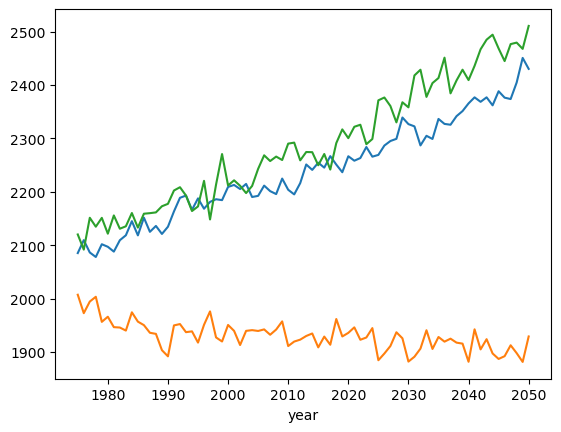

In [25]:
SMB_LE_proj_int_yearly.plot();
SMB_AAER_proj_int_yearly.plot();
SMB_GHG_proj_int_yearly.plot();

In [26]:
## Calculate cumulative SMB relative to the base period mean
SMB_LE_proj_int_yearly_cum = (SMB_LE_proj_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')
SMB_AAER_proj_int_yearly_cum = (SMB_AAER_proj_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')
SMB_AAER15_proj_int_yearly_cum = (SMB_AAER15_proj_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')
SMB_GHG_proj_int_yearly_cum = (SMB_GHG_proj_int_yearly - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

## Add ensemble spread

In [27]:
## CESM2-GHG
SMB_GHG_ensemble_int_yearly = xr.open_dataset('../SMB_GHG_ensemble_int_yearly.nc').SMB 

# Calculate cumulative SMB relative to the base period mean
#base_yr_s = 1850
#base_yr_e = 1900
SMB_GHG_ensemble_int_yearly_cum = np.zeros((15, 2050-1900))

for i in range(15):
#    SMB_GHG_ensemble_base_int_yearly_mean = SMB_GHG_ensemble_int_yearly.sel(num=i+1).sel(year=slice(str(base_yr_s), str(base_yr_e))).mean(dim='year')
    SMB_GHG_ensemble_int_yearly_cum[i,:] = (SMB_GHG_ensemble_int_yearly.sel(num=i+1).sel(year=slice('1901', '2050')) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [28]:
## CESM2-AAER 20 members
SMB_AAER_ensemble_int_yearly = xr.open_dataset('../SMB_AAER_ensemble_int_yearly.nc').SMB 

# Calculate cumulative SMB relative to the base period mean
#base_yr_s = 1850
#base_yr_e = 1900
SMB_AAER_ensemble_int_yearly_cum = np.zeros((20, 2050-1900))

for i in range(20):
#    SMB_AAER_ensemble_base_int_yearly_mean = SMB_AAER_ensemble_int_yearly.sel(num=i+1).sel(year=slice(str(base_yr_s), str(base_yr_e))).mean(dim='year')
    SMB_AAER_ensemble_int_yearly_cum[i,:] = (SMB_AAER_ensemble_int_yearly.sel(num=i+1).sel(year=slice('1901', '2050')) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [29]:
## CESM2-LE
SMB_LE_ensemble_int_yearly = xr.open_dataset('../SMB_LE_ensemble_int_yearly.nc').SMB

# Calculate cumulative SMB relative to the base period mean
#base_yr_s = 1850
#base_yr_e = 1900
SMB_LE_ensemble_int_yearly_cum = np.zeros((50, 2050-1900))

for i in range(50):
#    SMB_LE_ensemble_base_int_yearly_mean = SMB_LE_ensemble_int_yearly.sel(num=i+1).sel(year=slice(str(base_yr_s), str(base_yr_e))).mean(dim='year')
    SMB_LE_ensemble_int_yearly_cum[i,:] = (SMB_LE_ensemble_int_yearly.sel(num=i+1).sel(year=slice('1901', '2050')) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [30]:
## CESM2-PI, 20 segments
SMB_PI_ensemble_int_yearly = xr.open_dataset('../SMB_PI_ensemble_int_yearly.nc').SMB 

SMB_PI_ensemble_int_yearly_cum = np.zeros((20, 100))

for i in range(20):
    SMB_PI_ensemble_int_yearly_cum[i,:] = (SMB_PI_ensemble_int_yearly.sel(num=i+1) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

In [31]:
## CESM2-PI, 24 segments
SMB_PI24seg_ensemble_int_yearly = xr.open_dataset('../SMB_PI24seg_ensemble_int_yearly.nc').SMB 

SMB_PI24seg_ensemble_int_yearly_cum = np.zeros((24, 100))

for i in range(24):
    SMB_PI24seg_ensemble_int_yearly_cum[i,:] = (SMB_PI24seg_ensemble_int_yearly.sel(num=i+1) - SMB_PI_base_int_yearly_mean).cumsum(dim='year')

## Plot

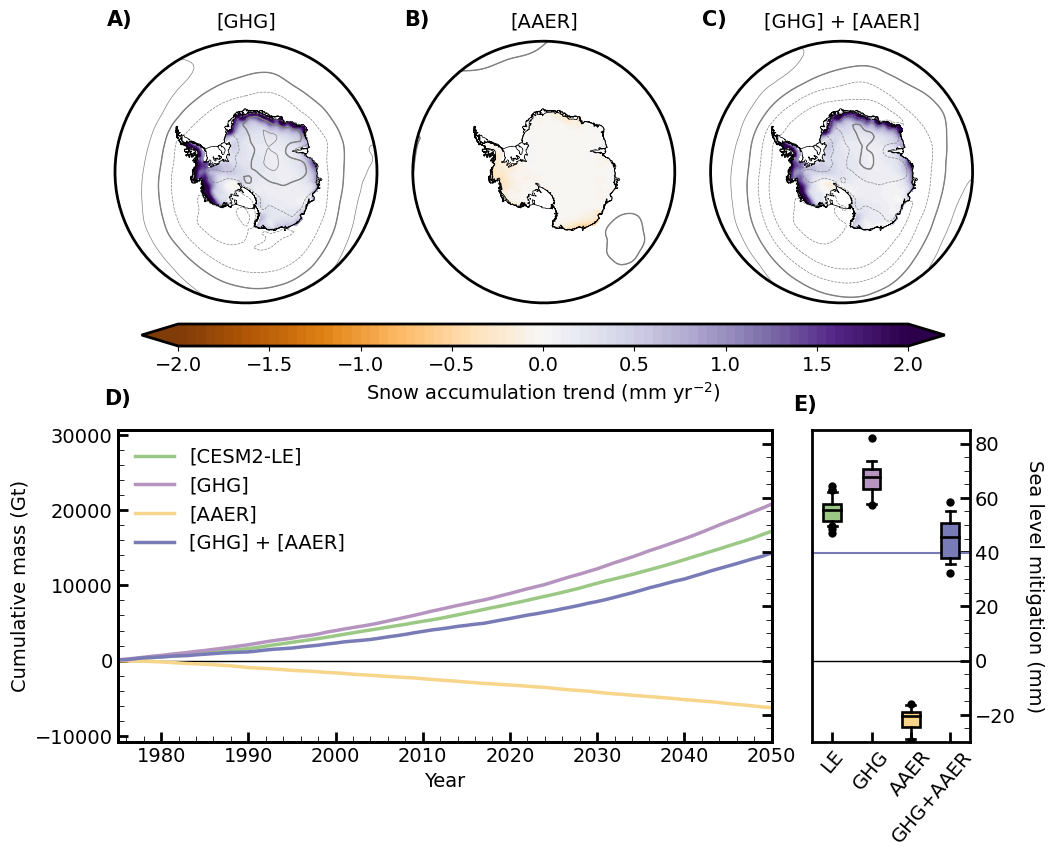

In [38]:
# Add SLP contours
fig=plt.figure(figsize=(11,11))
gs=GridSpec(9,9)
plt.rcParams['axes.titlepad'] =14
plt.rcParams["axes.linewidth"] = 2  # set the value globally

level_SMB = np.arange(-2., 2.01, 0.05)
ticks_SMB = np.arange(-2., 2.01, 0.5)

level_PSL = np.arange(0-1.5*100, 0+1.5*101, 1.5)
level_PSL0 = np.arange(-100., 100.1, 100.)

size_title = 14
size_label = 14
size_tick = 14
size_text = 15
size_legend = 14
width_contour = 0.5
width_line = 2.5
width_box = 1.9

#cmap1 = colors.LinearSegmentedColormap.from_list("", ["darkred", "red", "orange", "gold", "white", "turquoise", "dodgerblue", "blue", "navy"])
cmap1 = 'PuOr'

######################### Coupled #########################
#SUBPLOT 1
ax1 = plt.subplot(gs[0:4,0:3], projection=ccrs.SouthPolarStereo())
plot_antarctica(ax1, -50)

im1=ax1.contourf(lon_full, lat, slope_SMB_GHG_full_2000_2050, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both')
im1b = ax1.contour(lon_full, lat, slope_PSL_GHG_full_2000_2050, levels=level_PSL, linewidths=width_contour, colors=['gray'], transform=crs_ll)
im1c = ax1.contour(lon_full, lat, slope_PSL_GHG_full_2000_2050, levels=level_PSL0, linewidths=width_contour+0.5, colors=['gray'], transform=crs_ll)

ax1.set_title('[GHG]', pad=12, fontsize=size_title)
ax1.text(-5000000, 5220000, 'A)', fontsize=size_text, fontweight='bold')

#SUBPLOT 2
ax2 = plt.subplot(gs[0:4,3:6], projection=ccrs.SouthPolarStereo())
plot_antarctica(ax2, -50)

im2=ax2.contourf(lon_full, lat, slope_SMB_AAER_full_2000_2050, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both')
im2b = ax2.contour(lon_full, lat, slope_PSL_AAER_full_2000_2050, levels=level_PSL, linewidths=width_contour, colors=['gray'], transform=crs_ll)
im2c = ax2.contour(lon_full, lat, slope_PSL_AAER_full_2000_2050, levels=level_PSL0, linewidths=width_contour+0.5, colors=['gray'], transform=crs_ll)

ax2.set_title('[AAER]', pad=12, fontsize=size_title)
ax2.text(-5000000, 5220000, 'B)', fontsize=size_text, fontweight='bold')

#SUBPLOT 3
ax3 = plt.subplot(gs[0:4,6:9], projection=ccrs.SouthPolarStereo())
plot_antarctica(ax3, -50)

im3=ax3.contourf(lon_full, lat, slope_SMB_GHG_full_2000_2050+slope_SMB_AAER15_full_2000_2050, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both')
im3b = ax3.contour(lon_full, lat, slope_PSL_GHG_full_2000_2050+slope_PSL_AAER15_full_2000_2050, levels=level_PSL, linewidths=width_contour, colors=['gray'], transform=crs_ll)
im3c = ax3.contour(lon_full, lat, slope_PSL_GHG_full_2000_2050+slope_PSL_AAER15_full_2000_2050, levels=level_PSL0, linewidths=width_contour+0.5, colors=['gray'], transform=crs_ll)

ax3.set_title('[GHG] + [AAER]', pad=12, fontsize=size_title)
ax3.text(-5000000, 5220000, 'C)', fontsize=size_text, fontweight='bold')
#ax3.text(0, 3000000, 'C)', fontsize=size_text)

#Colorbar
cbar_ax = fig.add_axes([0.147, 0.58, 0.73, 0.02]) #[from left, from bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal', pad=.05, extend='both', boundaries=level_SMB, ticks=ticks_SMB)
cbar.ax.tick_params(labelsize=size_tick)
cbar.set_label('Snow accumulation trend (mm yr$^{-2}$)', size=size_label)

#------------------------------------------------------------------------
# cumulative SMB
ax4 = plt.subplot(gs[5:9,0:7])

#plt.axvline(x=2000, linestyle="--", color="lightgray", linewidth=1)
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
ax4.plot(SMB_LE_proj_int_yearly_cum.year, SMB_LE_proj_int_yearly_cum, color="#9BC985", linewidth=width_line, label="[CESM2-LE]")
ax4.plot(SMB_GHG_proj_int_yearly_cum.year, SMB_GHG_proj_int_yearly_cum, color="#B595BF", linewidth=width_line, label="[GHG]")
ax4.plot(SMB_AAER_proj_int_yearly_cum.year, SMB_AAER_proj_int_yearly_cum, color="#F7D58B", linewidth=width_line, label="[AAER]")
ax4.plot(SMB_GHG_proj_int_yearly_cum.year, (SMB_AAER15_proj_int_yearly_cum+SMB_GHG_proj_int_yearly_cum), color="#797BB7", linewidth=width_line, label="[GHG] + [AAER]")

ax4.legend(loc="best", frameon=False, prop={"size": size_legend}, ncol=1)

ax4.set_xlim([1975, 2050])
ax4.set_ylim([-30*f09_ocn_area/1e12, 85*f09_ocn_area/1e12])
ax4.set_xlabel("Year", fontsize=size_label)
ax4.set_ylabel("Cumulative mass (Gt)", fontsize=size_label)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which="major", length=7, width=2, direction="in")
ax4.tick_params(which="minor", length=4, direction="in")
# ax4.set_yticks([-1000, -500, 0, 500])
ax4.tick_params(labelsize=size_tick)
ax4.text(1973.5, 34000, 'D)', fontsize=size_text, fontweight='bold')

# SLR contribution
ax5 = ax4.twinx()

ax5.set_ylim([-30, 85])
#ax5.set_ylabel("Sea level mitigation (mm)", fontsize=size_label)
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.tick_params(which="major", length=7, width=2, direction="in")
ax5.tick_params(which="minor", length=4, direction="in")
ax5.tick_params(labelsize=size_tick, labelcolor='white')

#------------------------------------------------------------------------
# Box plot
ax6 = plt.subplot(gs[5:9,7:9])

data_LE = SMB_LE_ensemble_int_yearly_cum[:,149] *1e12/f09_ocn_area
data_GHG = SMB_GHG_ensemble_int_yearly_cum[:,149] *1e12/f09_ocn_area
data_AAER = SMB_AAER_ensemble_int_yearly_cum[:,149] *1e12/f09_ocn_area
data_GHG_AAER = (SMB_GHG_ensemble_int_yearly_cum[:,149] + SMB_AAER_ensemble_int_yearly_cum[:15,149]) *1e12/f09_ocn_area

boxprops = dict(linewidth=width_box)
medianprops = dict(linestyle='-', linewidth=width_box, color='black')
whiskerprops = dict(linewidth=width_box)
capprops = dict(linewidth=width_box)
flierprops = dict(marker='o', markerfacecolor='black', markersize=6, markeredgecolor='none')
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
plt.axhline(y=(SMB_GHG_proj_int_yearly_cum+SMB_AAER15_proj_int_yearly_cum).sel(year=2050)*1e12/f09_ocn_area, linestyle="-", color="#797BB7", linewidth=1.5)
bplot = ax6.boxplot([data_LE, data_GHG, data_AAER, data_GHG_AAER], whis=[5,95], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# fill with colors
colors = ['#9BC985', '#B595BF', '#F7D58B', "#797BB7"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax6.set_ylim([-30, 85])
ax6.yaxis.set_label_position("right")
ax6.set_ylabel("Sea level mitigation (mm)", fontsize=size_label, rotation=-90, labelpad=20)
ax6.set_xticks([1, 2, 3, 4], ['LE', 'GHG', 'AAER', ''], rotation=50)
ax6.set_xticks([3.53], minor=True)
ax6.set_xticklabels(['GHG+AAER'], minor=True, fontsize=size_tick, rotation=50)
ax6.tick_params(axis='x', which="minor", length=0)
ax6.text(0, 92, 'E)', fontsize=size_text, fontweight='bold')

ax6.yaxis.tick_right()
ax6.yaxis.set_minor_locator(AutoMinorLocator())
ax6.tick_params(which="major", length=7, width=2, direction="in")
ax6.tick_params(axis='y', which="minor", length=4, direction="in")
ax6.tick_params(labelsize=size_tick)


#plt.savefig(
#    "tseries_AIS_cumulative_SMB_proj_basePI2.png",
#    bbox_inches="tight",
#)  #

plt.subplots_adjust(#left=0.1,
                    bottom=0.22,
                    #right=0.9,
                    #top=0.9,
                    wspace=0.7,
                    hspace=0.3)

plt.savefig('plot/F7_map_AIS_SMB_SLP_trend_2000_2050_tseries_cumulative_SMB_1975_2050_basePI2.jpg', dpi=300, facecolor="w", transparent=False)
plt.show()

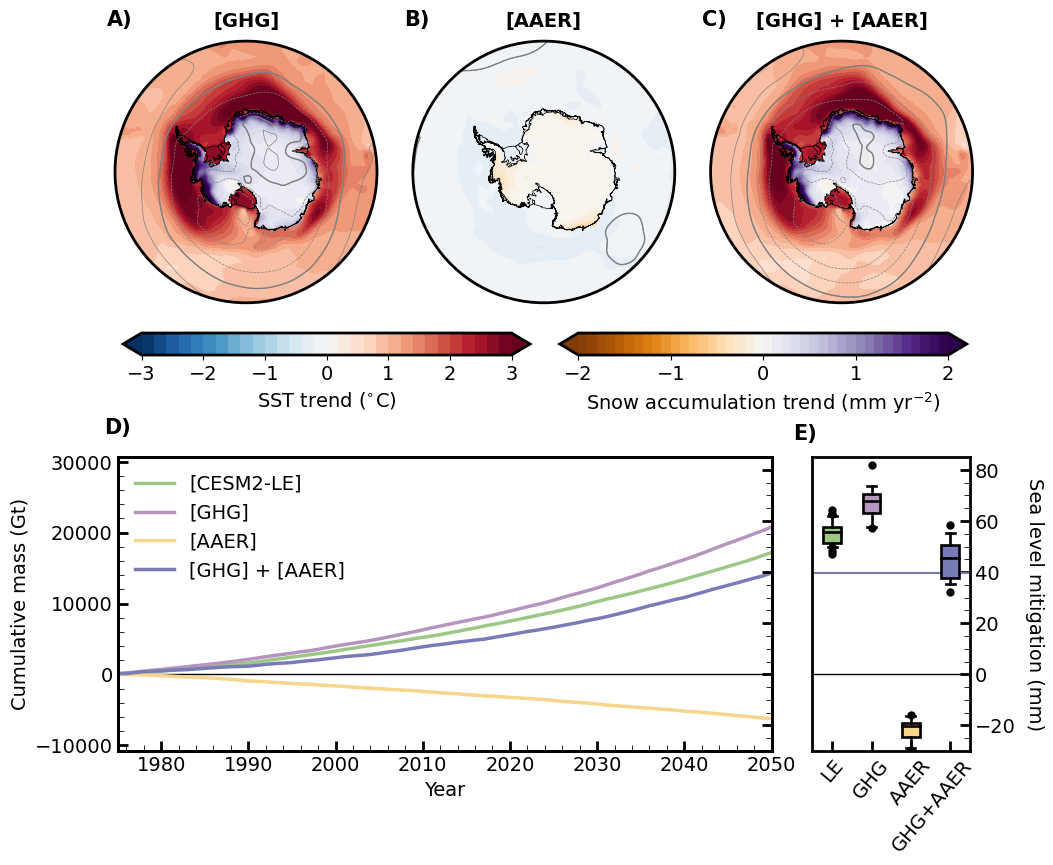

In [32]:
# Add SLP contours and TREFHT trend over ocean
fig=plt.figure(figsize=(11,11))
gs=GridSpec(9,9)
plt.rcParams['axes.titlepad'] =14
plt.rcParams["axes.linewidth"] = 2  # set the value globally

level_SMB = np.arange(-2., 2.01, 0.1)
ticks_SMB = np.arange(-2., 2.01, 1)

level_PSL = np.arange(0-1.5*100, 0+1.5*101, 1.5)
level_PSL0 = np.arange(-100., 100.1, 100.)

level_TREFHT = np.arange(-3., 3.01, 0.2)
ticks_TREFHT = np.arange(-3., 3.01, 1.)

size_title = 14
size_label = 14
size_tick = 14
size_text = 15
size_legend = 14
width_contour = 0.5
width_line = 2.5
width_box = 1.9

cmap1 = 'RdBu_r'
cmap2 = 'PuOr'

######################### Coupled #########################
#SUBPLOT 1
ax1 = plt.subplot(gs[0:4,0:3], projection=ccrs.SouthPolarStereo())
plot_antarctica(ax1, -50)

im1a=ax1.contourf(lon_full, lat, slope_TREFHT_GHG_full_2000_2050, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_TREFHT, extend='both')
im1b=ax1.contourf(lon_full, lat, slope_SMB_GHG_full_2000_2050, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both')
im1c = ax1.contour(lon_full, lat, slope_PSL_GHG_full_2000_2050, levels=level_PSL, linewidths=width_contour, colors=['gray'], transform=crs_ll)
im1d = ax1.contour(lon_full, lat, slope_PSL_GHG_full_2000_2050, levels=level_PSL0, linewidths=width_contour+0.5, colors=['gray'], transform=crs_ll)

ax1.set_title('[GHG]', pad=12, fontsize=size_title, fontweight='bold')
ax1.text(-5000000, 5220000, 'A)', fontsize=size_text, fontweight='bold')

#SUBPLOT 2
ax2 = plt.subplot(gs[0:4,3:6], projection=ccrs.SouthPolarStereo())
plot_antarctica(ax2, -50)

im2a=ax2.contourf(lon_full, lat, slope_TREFHT_AAER_full_2000_2050, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_TREFHT, extend='both')
im2b=ax2.contourf(lon_full, lat, slope_SMB_AAER_full_2000_2050, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both')
im2c = ax2.contour(lon_full, lat, slope_PSL_AAER_full_2000_2050, levels=level_PSL, linewidths=width_contour, colors=['gray'], transform=crs_ll)
im2d = ax2.contour(lon_full, lat, slope_PSL_AAER_full_2000_2050, levels=level_PSL0, linewidths=width_contour+0.5, colors=['gray'], transform=crs_ll)

ax2.set_title('[AAER]', pad=12, fontsize=size_title, fontweight='bold')
ax2.text(-5000000, 5220000, 'B)', fontsize=size_text, fontweight='bold')

#SUBPLOT 3
ax3 = plt.subplot(gs[0:4,6:9], projection=ccrs.SouthPolarStereo())
plot_antarctica(ax3, -50)

im3a=ax3.contourf(lon_full, lat, slope_TREFHT_GHG_full_2000_2050+slope_TREFHT_AAER15_full_2000_2050, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_TREFHT, extend='both')
im3b=ax3.contourf(lon_full, lat, slope_SMB_GHG_full_2000_2050+slope_SMB_AAER15_full_2000_2050, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both')
im3c = ax3.contour(lon_full, lat, slope_PSL_GHG_full_2000_2050+slope_PSL_AAER15_full_2000_2050, levels=level_PSL, linewidths=width_contour, colors=['gray'], transform=crs_ll)
im3d = ax3.contour(lon_full, lat, slope_PSL_GHG_full_2000_2050+slope_PSL_AAER15_full_2000_2050, levels=level_PSL0, linewidths=width_contour+0.5, colors=['gray'], transform=crs_ll)

ax3.set_title('[GHG] + [AAER]', pad=12, fontsize=size_title, fontweight='bold')
ax3.text(-5000000, 5220000, 'C)', fontsize=size_text, fontweight='bold')
#ax3.text(0, 3000000, 'C)', fontsize=size_text)

#Colorbar
cbar1_ax = fig.add_axes([0.13, 0.58, 0.37, 0.02]) #[from left, from bottom, width, height]
cbar1 = fig.colorbar(im1a, cax=cbar1_ax, orientation='horizontal', pad=.05, extend='both', boundaries=level_TREFHT, ticks=ticks_TREFHT)
cbar1.ax.tick_params(labelsize=size_tick)
cbar1.set_label('SST trend ($^{\circ}$C)', size=size_label)

cbar2_ax = fig.add_axes([0.527, 0.58, 0.37, 0.02]) #[from left, from bottom, width, height]
cbar2 = fig.colorbar(im1b, cax=cbar2_ax, orientation='horizontal', pad=.05, extend='both', boundaries=level_SMB, ticks=ticks_SMB)
cbar2.ax.tick_params(labelsize=size_tick)
cbar2.set_label('Snow accumulation trend (mm yr$^{-2}$)', size=size_label)

#------------------------------------------------------------------------
# cumulative SMB
ax4 = plt.subplot(gs[5:9,0:7])

#plt.axvline(x=2000, linestyle="--", color="lightgray", linewidth=1)
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
ax4.plot(SMB_LE_proj_int_yearly_cum.year, SMB_LE_proj_int_yearly_cum, color="#9BC985", linewidth=width_line, label="[CESM2-LE]")
ax4.plot(SMB_GHG_proj_int_yearly_cum.year, SMB_GHG_proj_int_yearly_cum, color="#B595BF", linewidth=width_line, label="[GHG]")
ax4.plot(SMB_AAER_proj_int_yearly_cum.year, SMB_AAER_proj_int_yearly_cum, color="#F7D58B", linewidth=width_line, label="[AAER]")
ax4.plot(SMB_GHG_proj_int_yearly_cum.year, (SMB_AAER15_proj_int_yearly_cum+SMB_GHG_proj_int_yearly_cum), color="#797BB7", linewidth=width_line, label="[GHG] + [AAER]")

ax4.legend(loc="best", frameon=False, prop={"size": size_legend}, ncol=1)

ax4.set_xlim([1975, 2050])
ax4.set_ylim([-30*f09_ocn_area/1e12, 85*f09_ocn_area/1e12])
ax4.set_xlabel("Year", fontsize=size_label)
ax4.set_ylabel("Cumulative mass (Gt)", fontsize=size_label)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which="major", length=7, width=2, direction="in")
ax4.tick_params(which="minor", length=4, direction="in")
# ax4.set_yticks([-1000, -500, 0, 500])
ax4.tick_params(labelsize=size_tick)
ax4.text(1973.5, 34000, 'D)', fontsize=size_text, fontweight='bold')

# SLR contribution
ax5 = ax4.twinx()

ax5.set_ylim([-30, 85])
#ax5.set_ylabel("Sea level mitigation (mm)", fontsize=size_label)
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.tick_params(which="major", length=7, width=2, direction="in")
ax5.tick_params(which="minor", length=4, direction="in")
ax5.tick_params(labelsize=size_tick, labelcolor='white')

#------------------------------------------------------------------------
# Box plot
ax6 = plt.subplot(gs[5:9,7:9])

data_LE = SMB_LE_ensemble_int_yearly_cum[:,149] *1e12/f09_ocn_area
data_GHG = SMB_GHG_ensemble_int_yearly_cum[:,149] *1e12/f09_ocn_area
data_AAER = SMB_AAER_ensemble_int_yearly_cum[:,149] *1e12/f09_ocn_area
data_GHG_AAER = (SMB_GHG_ensemble_int_yearly_cum[:,149] + SMB_AAER_ensemble_int_yearly_cum[:15,149]) *1e12/f09_ocn_area

boxprops = dict(linewidth=width_box)
medianprops = dict(linestyle='-', linewidth=width_box, color='black')
whiskerprops = dict(linewidth=width_box)
capprops = dict(linewidth=width_box)
flierprops = dict(marker='o', markerfacecolor='black', markersize=6, markeredgecolor='none')
plt.axhline(y=0, linestyle="-", color="black", linewidth=1)
plt.axhline(y=(SMB_GHG_proj_int_yearly_cum+SMB_AAER15_proj_int_yearly_cum).sel(year=2050)*1e12/f09_ocn_area, linestyle="-", color="#797BB7", linewidth=1.5)
bplot = ax6.boxplot([data_LE, data_GHG, data_AAER, data_GHG_AAER], whis=[5,95], boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)

# fill with colors
colors = ['#9BC985', '#B595BF', '#F7D58B', "#797BB7"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax6.set_ylim([-30, 85])
ax6.yaxis.set_label_position("right")
ax6.set_ylabel("Sea level mitigation (mm)", fontsize=size_label, rotation=-90, labelpad=20)
ax6.set_xticks([1, 2, 3, 4], ['LE', 'GHG', 'AAER', ''], rotation=50)
ax6.set_xticks([3.53], minor=True)
ax6.set_xticklabels(['GHG+AAER'], minor=True, fontsize=size_tick, rotation=50)
ax6.tick_params(axis='x', which="minor", length=0)
ax6.text(0, 92, 'E)', fontsize=size_text, fontweight='bold')

ax6.yaxis.tick_right()
ax6.yaxis.set_minor_locator(AutoMinorLocator())
ax6.tick_params(which="major", length=7, width=2, direction="in")
ax6.tick_params(axis='y', which="minor", length=4, direction="in")
ax6.tick_params(labelsize=size_tick)


plt.subplots_adjust(#left=0.1,
                    bottom=0.22,
                    #right=0.9,
                    #top=0.9,
                    wspace=0.7,
                    hspace=1.5)

plt.savefig('plot/F7_map_AIS_SMB_SLP_TREFHT_trend_2000_2050_tseries_cumulative_SMB_1975_2050_basePI2.jpg', dpi=300, facecolor="w", transparent=False)
plt.show()